# meteoPATH data Analysis
#### Karolina Jankiewicz - January 2019

### Basic time series data analysis

In [170]:
# Importing libraries

import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
## The path where we have datasets
print(os.listdir("./data"))

['2019-01-07_tweets.csv', '2019-01-07_weather.csv', '2019-01-08_tweets.csv', '2019-01-08_weather.csv', '2019-01-09_tweets.csv', '2019-01-09_weather.csv', '2019-01-10_tweets.csv', 'tweets.csv', 'weather.csv']


In [171]:
#Import main data files
weather = pd.read_csv(
    './data/weather.csv',
    index_col='time',infer_datetime_format=True,
    parse_dates=['time'] )

weather

tweets = pd.read_csv(
    './data/tweets.csv',
    index_col='time',infer_datetime_format=True,
    parse_dates=['time'] )
tweets

,GB_Pos,GB_Neg,GB_Neu,GB_Total,US_Pos,US_Neg,US_Neu,US_Total,JP_Pos,JP_Neg,JP_Neu,JP_Total
time,,,,,,,,,,,,
2018-12-27 20:45:43.149,2,0,1,3,2,0,1,3,0,0,3,3
2018-12-27 20:45:48.447,2,0,2,4,0,1,4,5,0,0,1,1
2018-12-27 20:45:53.823,1,0,2,3,2,1,7,10,0,0,2,2
2018-12-27 20:45:59.153,0,0,2,2,3,0,2,5,0,0,1,1
2018-12-27 20:46:04.791,1,0,0,1,2,2,4,8,0,0,0,0
2018-12-27 20:46:10.299,2,0,0,2,1,0,4,5,0,0,0,0
2018-12-27 20:46:16.693,1,0,2,3,2,0,2,4,0,0,0,0
2018-12-27 20:46:21.778,1,0,1,2,2,0,6,8,0,0,2,2
2018-12-27 20:46:27.341,0,1,1,2,3,1,4,8,0,0,2,2


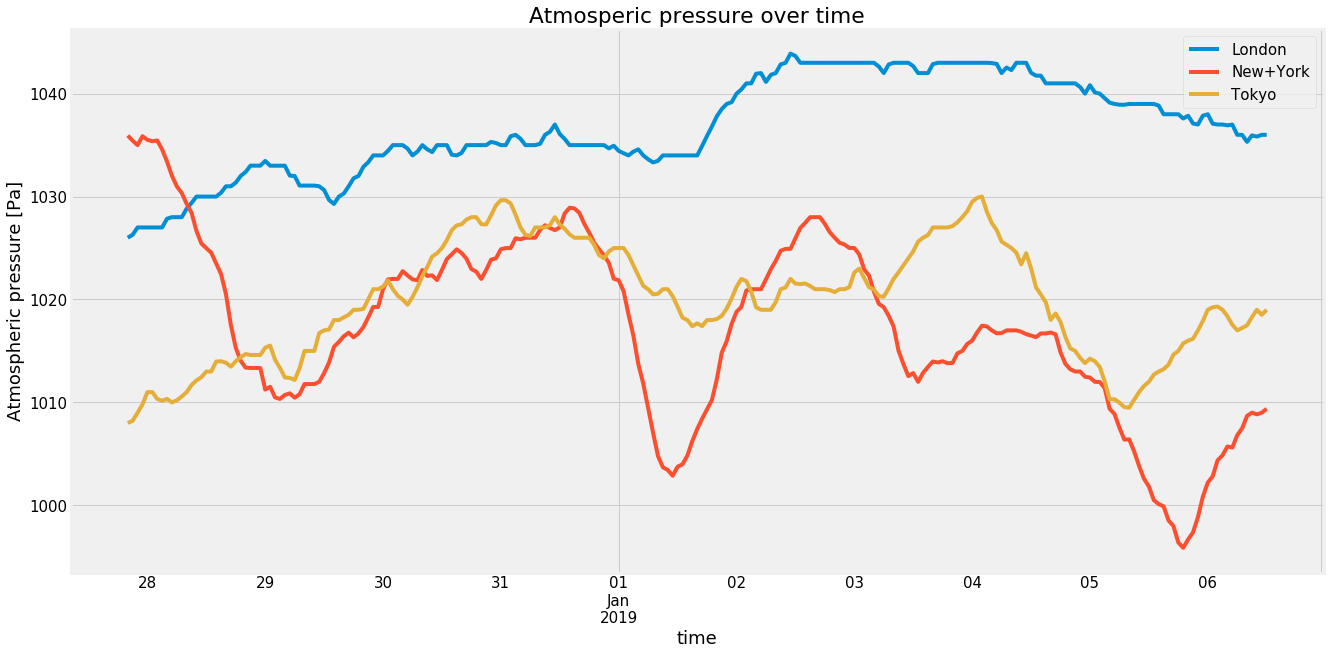

In [172]:
#Plot pressure data

plt.figure(figsize=(20, 10))
plt.rc('font', size=15) 
grouped=weather.groupby('city')
shifts={'London':-1, 'New+York':-6, 'Tokyo':8} #Shift all to the same timezone (initial is GMT+1)

for name, data in grouped:
    timeshift=shifts[name]
    pres_dat=data['pressure'].shift(timeshift)
    pres_dat=pres_dat.resample('H').mean().fillna(method='ffill')
    pres_dat.plot(label =name) 
plt.ylabel('Atmospheric pressure [Pa]')
plt.title('Atmosperic pressure over time') 
plt.legend()
plt.show()

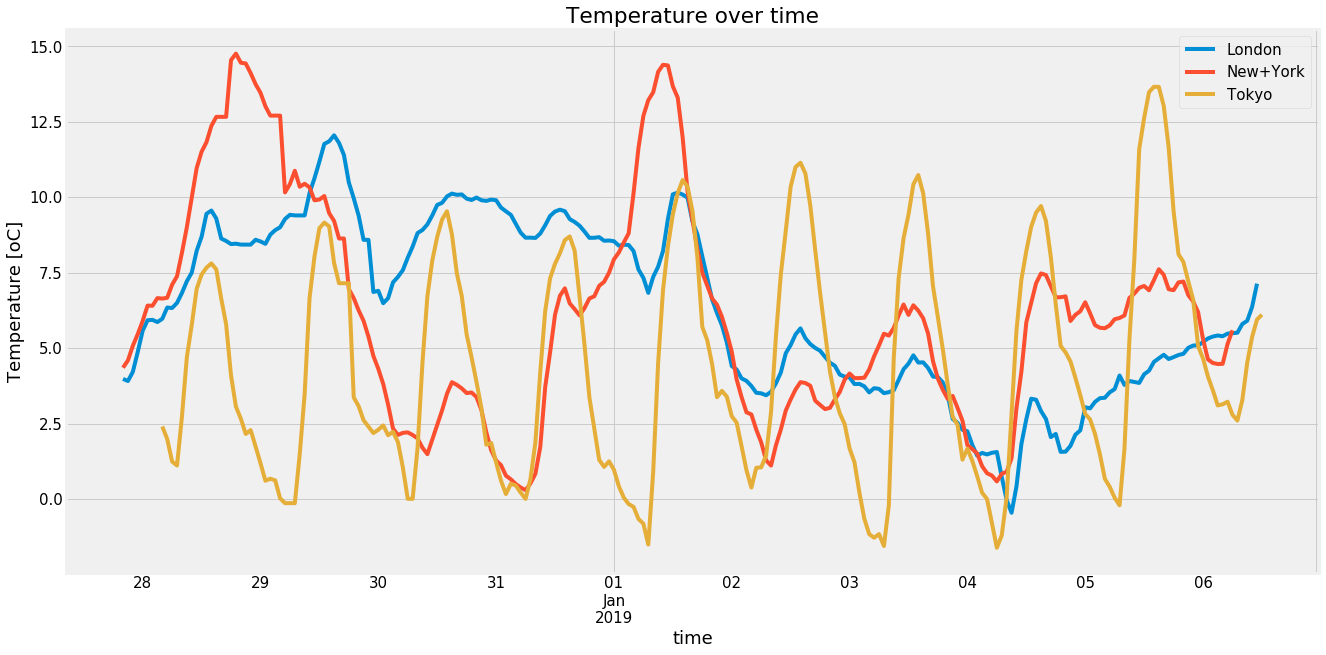

In [173]:
#Plot temperature

plt.figure(figsize=(20, 10))
plt.rc('font', size=15) 
for name, data in grouped:
    timeshift=shifts[name]
    temp_dat=data['temperature']-273#.interpolate(method='cubic')#convert to celsius
    temp_dat=temp_dat.resample('H').mean().fillna(method='ffill')
    temp_dat.shift(timeshift).plot(label =name) 
plt.ylabel('Temperature [oC]')
plt.title('Temperature over time')
plt.legend()
plt.show()

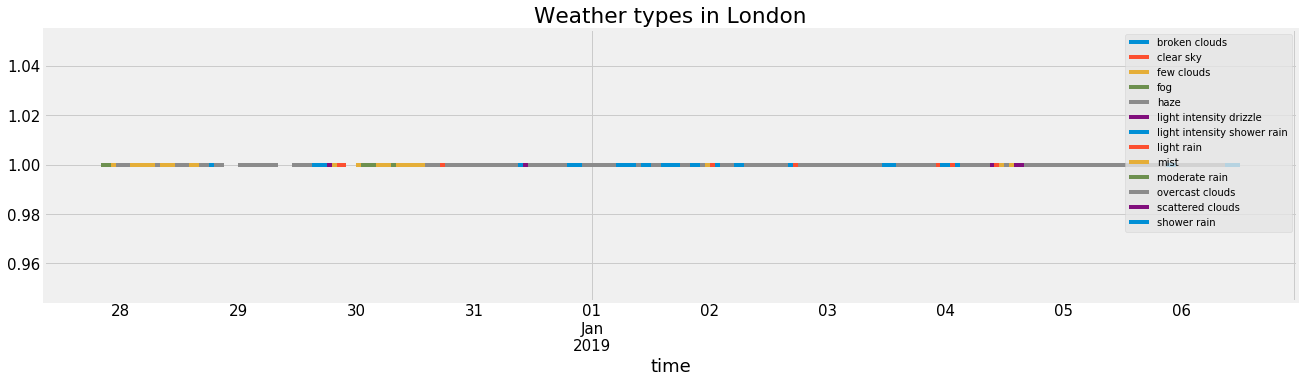

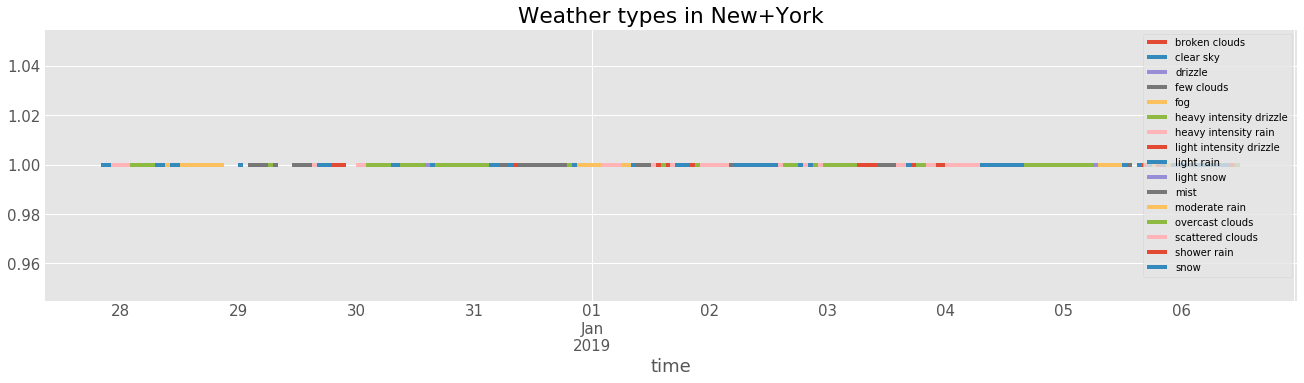

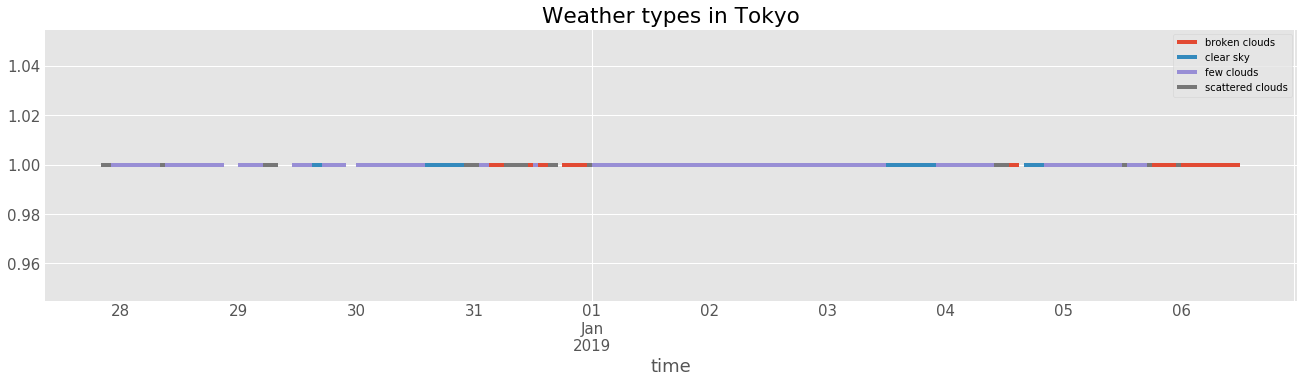

In [174]:
from mpltools import style
from mpltools import layout
i=0

for name, data in grouped:
    plt.figure(figsize=(20, 5))
    plt.rc('font', size=15) 
    for key, data in data.groupby('description'):
        dat=data['pressure']*0+1
        dat=dat.resample('H').mean()
        dat.plot(label=key)
    plt.title('Weather types in '+name)
    plt.style.use('ggplot')
    plt.legend(loc='best')
    plt.show()

### Twitter data

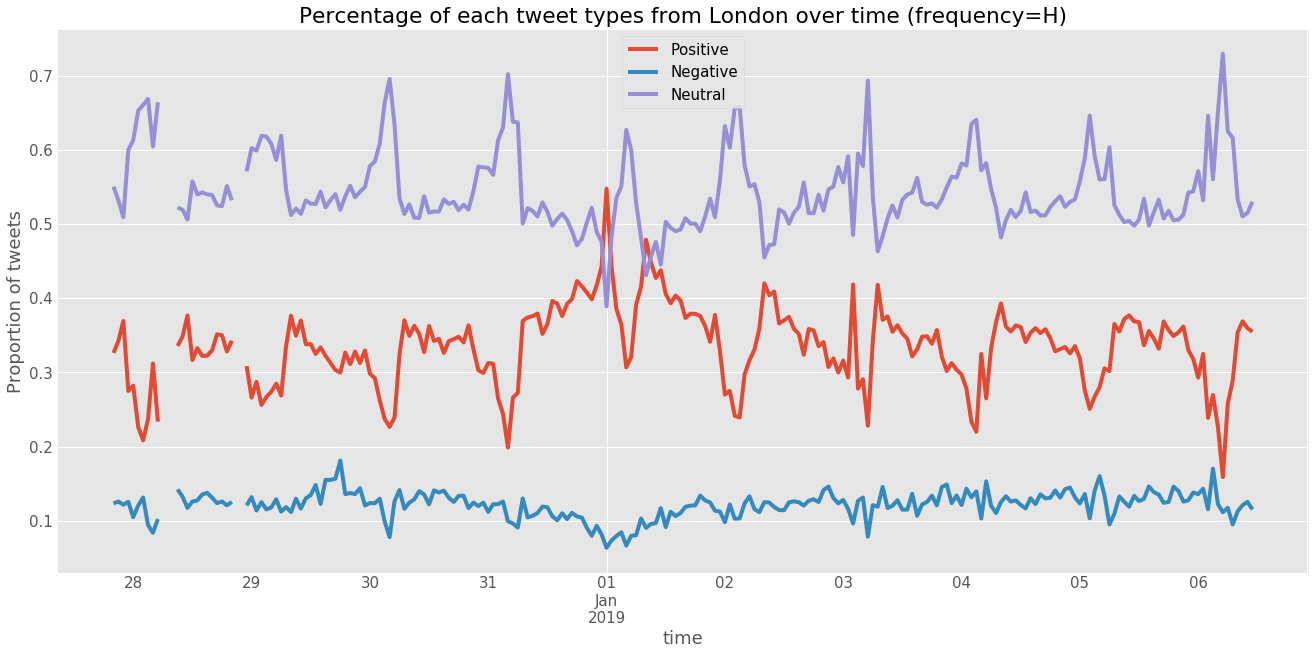

In [175]:
plt.figure(figsize=(20, 10))
plt.rc('font', size=15) 
freq='H'
gb_pos=tweets['GB_Pos'].resample(freq).mean().shift(-1)
gb_neg=tweets['GB_Neg'].resample(freq).mean().shift(-1)
gb_neu=tweets['GB_Neu'].resample(freq).mean().shift(-1)
gb_tot=tweets['GB_Total'].resample(freq).mean().shift(-1)

gb_p=gb_pos/gb_tot
gb_n=gb_neg/gb_tot
gb_nt=gb_neu/gb_tot


gb_p.plot(label='Positive')
gb_n.plot(label='Negative')
gb_nt.plot(label='Neutral')
#gb_tot.plot(label='All')

plt.ylabel('Proportion of tweets')
plt.title('Percentage of each tweet types from London over time (frequency='+freq+')')
plt.legend(loc='upper center')
plt.show()

#### Weather types

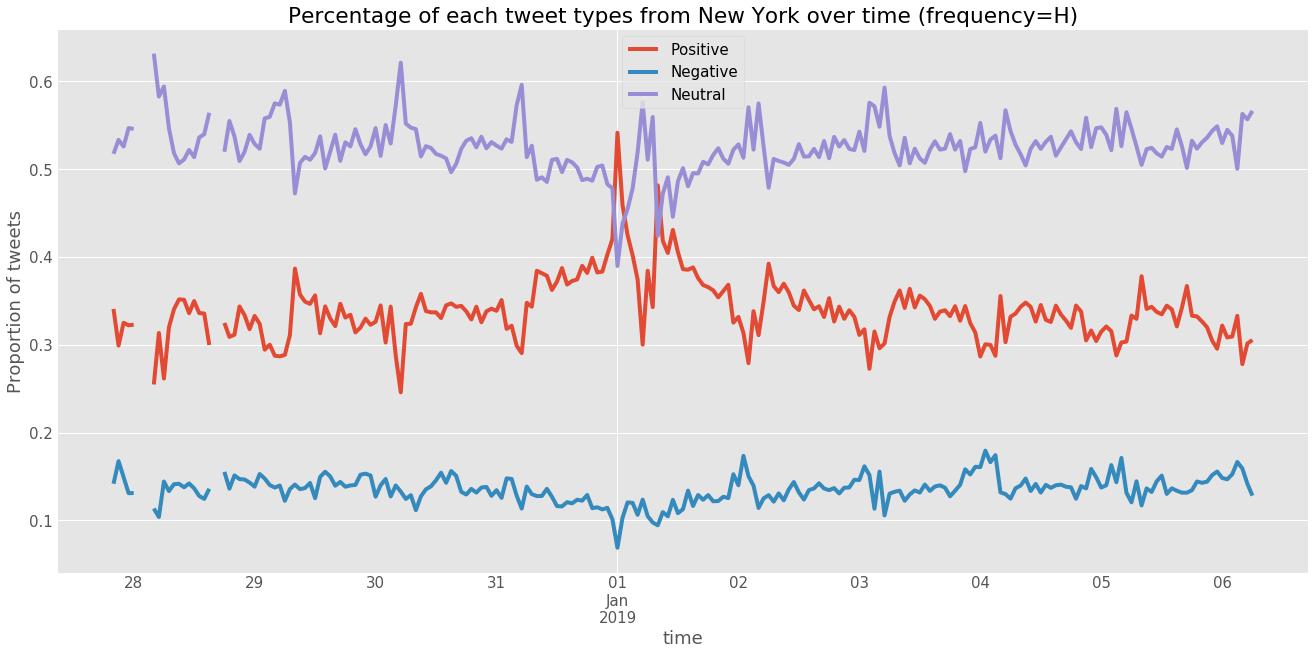

In [176]:
plt.figure(figsize=(20, 10))
plt.rc('font', size=15) 
freq='H'
us_pos=tweets['US_Pos'].resample(freq).mean().shift(-6)
us_neg=tweets['US_Neg'].resample(freq).mean().shift(-6)
us_neu=tweets['US_Neu'].resample(freq).mean().shift(-6)
us_tot=tweets['US_Total'].resample(freq).mean().shift(-6)


us_p=us_pos/us_tot
us_n=us_neg/us_tot
us_nt=us_neu/us_tot

us_p.plot(label='Positive')
us_n.plot(label='Negative')
us_nt.plot(label='Neutral')
#us_tot.plot(label='Total')

plt.ylabel('Proportion of tweets')
plt.title('Percentage of each tweet types from New York over time (frequency='+freq+')')
plt.legend(loc='upper center')
plt.show()

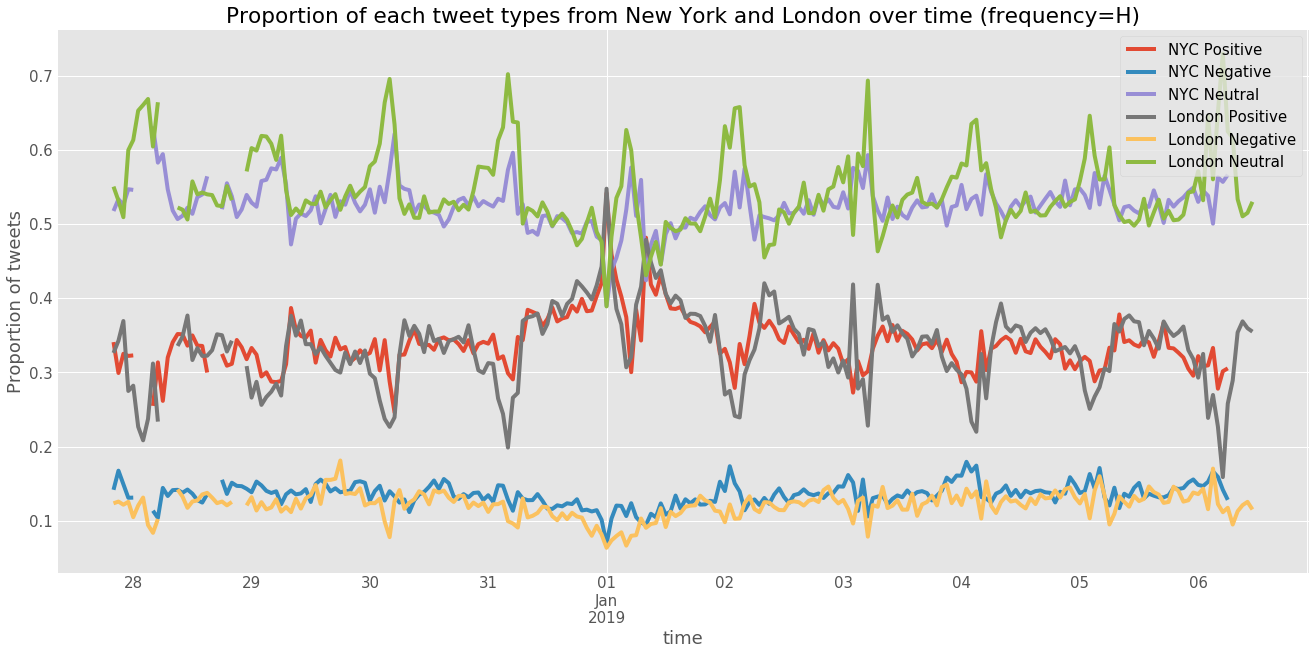

In [177]:
plt.figure(figsize=(20, 10))
plt.rc('font', size=15) 

us_p.plot(label='NYC Positive')
us_n.plot(label='NYC Negative')
us_nt.plot(label='NYC Neutral')
#us_tot.plot(label='Total')
gb_p.plot(label='London Positive')
gb_n.plot(label='London Negative')
gb_nt.plot(label='London Neutral')
#gb_tot.plot(label='All')

plt.ylabel('Proportion of tweets')
plt.title('Proportion of each tweet types from New York and London over time (frequency='+freq+')')
plt.legend(loc='best')
plt.show()

# Investigating autocorrelations

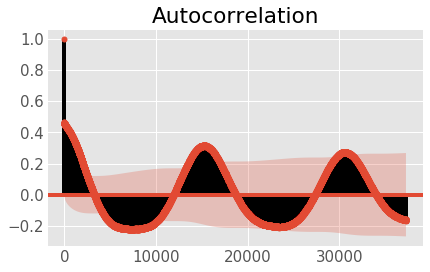

In [178]:
# Autocorrelation of tweets from New York
acf = plot_acf(tweets['US_Total'], lags=37280)
plt.show()

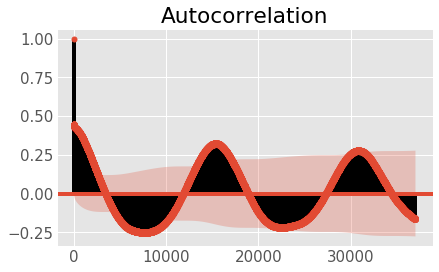

In [179]:
# Autocorrelation of tweets from London
acf = plot_acf(tweets['GB_Total'], lags=37000)
plt.show()

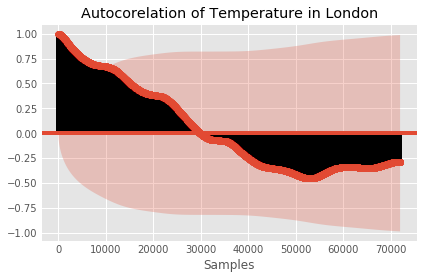

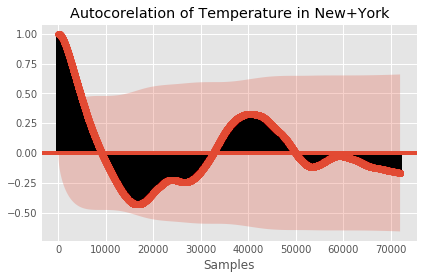

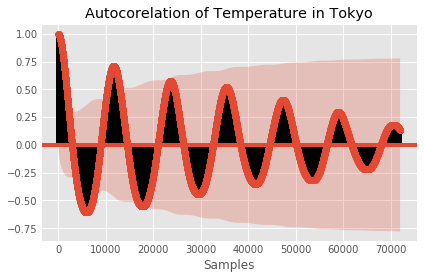

In [180]:
# Autocorrelation of temperature in the three cities
lags=(3600*24*5)/6

plt.rc('font', size=10) 
for name, data in grouped:
    acf = plot_acf(data['temperature'], lags=lags)
    plt.title('Autocorelation of Temperature in '+name)
    plt.xlabel('Samples')
    plt.show()
    i+=1

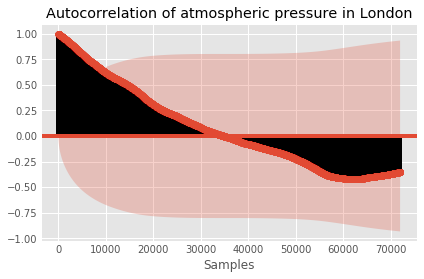

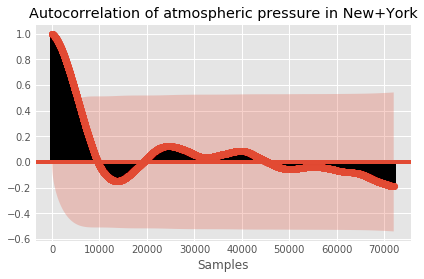

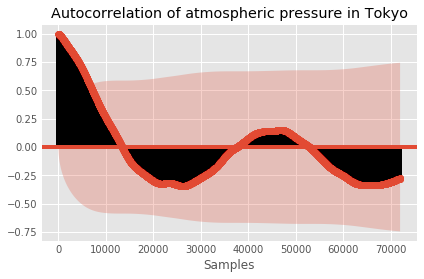

In [181]:
# Autocorrelation of pressure in the three cities
lags=(3600*24*5)/6
for name, data in grouped:
    acf = plot_acf(data['pressure'], lags=lags)
    plt.title('Autocorrelation of atmospheric pressure in '+name)
    plt.xlabel('Samples')
    plt.show()

Text(0.5,1,'Filtered number of Positive Tweets from New York ')

<Figure size 1440x720 with 0 Axes>

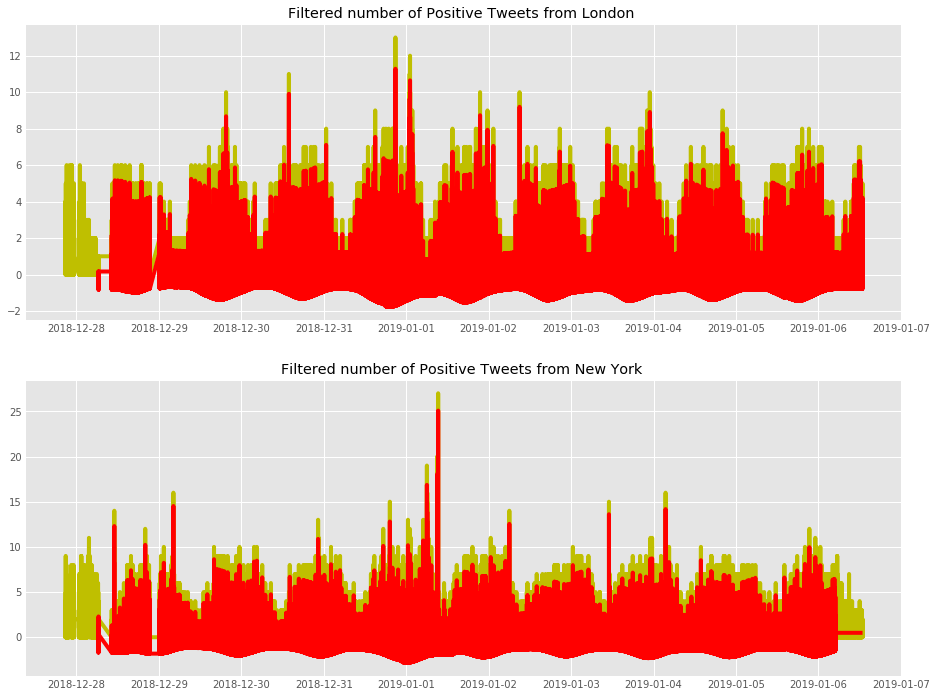

In [182]:
#%% show autocorr and lag plots
plt.figure(figsize=(20, 10))
import matplotlib.gridspec as gridspec
from pandas.plotting import autocorrelation_plot, lag_plot

selectedLagPoints = [1,3,6,9,12,24,36,48,60]
maxLagDays = 7

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(14,12))
originalSignal = tweets['GB_Pos']
t0=tweets.index
windowSize = 10000
lowPassFiltered_GB_Pos = originalSignal.rolling(windowSize, center=True).mean()
highPassFiltered_GB_Pos = originalSignal - lowPassFiltered_GB_Pos.fillna(method='ffill')

ax[0].plot(t0,originalSignal,c='y')
ax[0].plot(t0,highPassFiltered_GB_Pos,c='r')
ax[0].set_title('Filtered number of Positive Tweets from London ')
originalSignal = tweets['US_Pos']
lowPassFilteredSignal = originalSignal.rolling(windowSize, center=True).mean()
highPassFiltered_US_Pos = originalSignal - lowPassFilteredSignal
ax[1].plot(t0,originalSignal,c='y')
ax[1].plot(t0,highPassFiltered_US_Pos.fillna(method='ffill'),c='r')
ax[1].set_title('Filtered number of Positive Tweets from New York ')


<Figure size 1440x720 with 0 Axes>

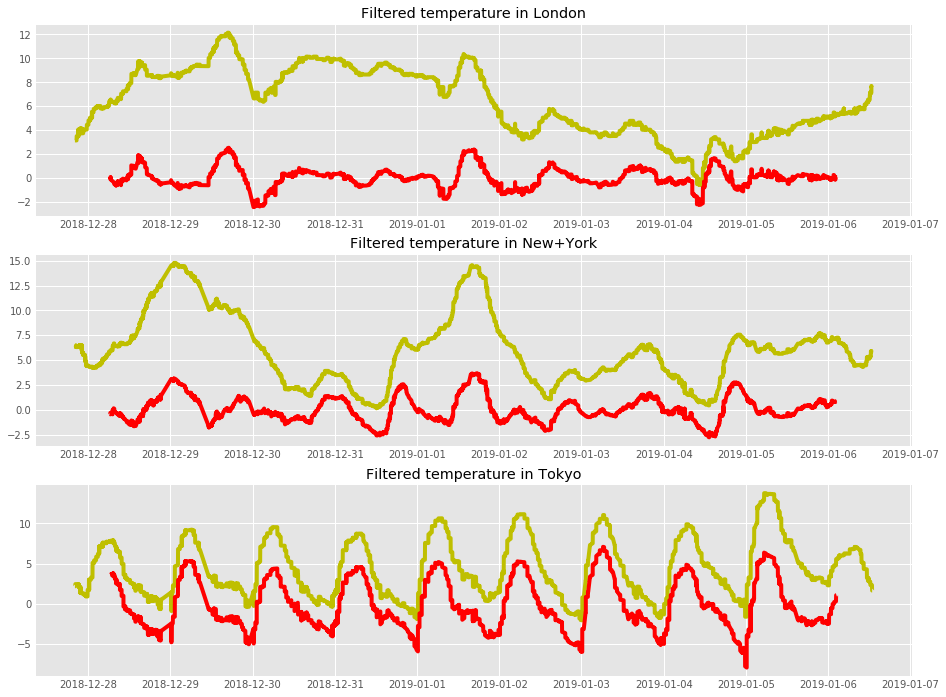

In [183]:
#%% show hautocorr and lag plots
plt.figure(figsize=(20, 10))
plt.rc('font', size=10) 
i=0
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(14,12))
filteredtemps={}
for name, data in grouped:
    originalSignal = data['temperature']-273
    t0=data.index
    windowSize = 10000
    lowPassFilteredSignal = originalSignal.rolling(windowSize, center=True).mean()
    highPassFilteredSignal= originalSignal - lowPassFilteredSignal
    filteredtemps[name]=highPassFilteredSignal
    ax[i].plot(t0,originalSignal,c='y')
    ax[i].set_title('Filtered temperature in '+name)
    ax[i].plot(t0,highPassFilteredSignal,c='r')
    i+=1

## Data Cross correlation

In [184]:
import statsmodels.formula.api as smf

#Independent variables - Pressure and Temperature
for name, data in grouped:
    if name=='London':
        temp_dat=data['temperature']-273#.interpolate(method='cubic')#convert to celsius
        temp=temp_dat.resample('H').mean().fillna(method='ffill')
        pres_dat=data['pressure']
        pres=pres_dat.resample('H').mean().fillna(method='ffill')

#gb_p=gb_p.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')
positivity=gb_p.fillna(method='ffill') #dependent variable


tempmdl = smf.OLS(positivity, temp).fit()
print tempmdl.summary()

                      
presmdl= smf.OLS(positivity, pres).fit()
print presmdl.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1104.
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           3.55e-90
Time:                        15:03:28   Log-Likelihood:                 126.47
No. Observations:                 233   AIC:                            -250.9
Df Residuals:                     232   BIC:                            -247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0444      0.001     33.231      

In [185]:
#Comparing high pass filtered data (removed influence of time of day)
highPassFiltered_GB_Pos=highPassFiltered_GB_Pos.replace([np.inf, -np.inf], np.nan).fillna(method='ffill') #remove any infs
filteredtemp=filteredtemps['London']

X=np.array(filteredtemp.resample('H').mean().fillna(method='ffill').fillna(method='bfill'))
y=np.array(highPassFiltered_GB_Pos.resample('H').fillna(method='ffill').fillna(method='bfill'))

GBhighpassedmdl = smf.OLS(y, X).fit() #make linear model with removing last few nans

print GBhighpassedmdl.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5450
Date:                Thu, 10 Jan 2019   Prob (F-statistic):              0.461
Time:                        15:03:28   Log-Likelihood:                -359.48
No. Observations:                 233   AIC:                             721.0
Df Residuals:                     232   BIC:                             724.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0694      0.094      0.738      0.4

In [169]:
#Comparing high pass filtered data (removed influence of time of day) for New York
highPassFiltered_US_Pos=highPassFiltered_US_Pos.replace([np.inf, -np.inf], np.nan).fillna(method='ffill') #remove any infs
filteredtemp=filteredtemps['New+York']

X=np.array(filteredtemp.resample('H').mean().fillna(method='ffill').fillna(method='bfill'))
y=np.array(highPassFiltered_US_Pos.resample('H').fillna(method='ffill').fillna(method='bfill'))

UShighpassedmdl = smf.OLS(y, X).fit() #make linear model with removing last few nans

print UShighpassedmdl.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.627
Date:                Thu, 10 Jan 2019   Prob (F-statistic):             0.0581
Time:                        13:01:53   Log-Likelihood:                -398.38
No. Observations:                 233   AIC:                             798.8
Df Residuals:                     232   BIC:                             802.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1368      0.072      1.904      0.0